In [39]:
! pip install "everywhereml>=0.2.32"

In [40]:
pip install pandas openpyxl

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers

In [45]:
def load_Xy():
    # Ganti path ini ke file Excel kamu
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_excel("Dataset_FIX.xlsx")
    print(df.columns)
    print(df.tail())  # Lihat baris terakhir

    # Misalnya fitur dari kolom A sampai kolom G
    X = df.iloc[:, :-1].values  # Semua kolom kecuali terakhir
    y = df.iloc[:, -1].values   # Kolom terakhir = durasi siram

    return X, y, df # Return df as well

In [46]:
def get_Xy():
    X, y, df = load_Xy() # Capture df here

    X = np.asarray(X)
    y = np.asarray(y).astype(float)  # pastikan y tipe float

    # Kalau y 1D, reshape supaya jadi 2D
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)

    # Normalisasi X
    X_scaler = MinMaxScaler()
    X_norm = X_scaler.fit_transform(X)

    # Normalisasi y juga!
    y_scaler = MinMaxScaler()
    y_norm = y_scaler.fit_transform(y)

    return X_norm, y_norm, y_scaler, df

In [47]:
def instantiate_nn_for_regression(input_shape):
    model = tf.keras.Sequential()
    model.add(layers.Dense(50, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(1))  # Output 1 untuk regresi
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Squared Error & MAE
    return model


In [48]:
X, y, y_scaler, df = get_Xy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

input_shape = X.shape[1:]
model = instantiate_nn_for_regression(input_shape)
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_val, y_val))

Saving Dataset_FIX.xlsx to Dataset_FIX.xlsx
Index(['suhu_A', 'kelembapan_udara_A', 'kecepatan_angin_A', 'curah_hujan_A',
       'suhu_S', 'kelembapan_udara_S', 'kelembapan_tanah_S', 'durasi'],
      dtype='object')
    suhu_A  kelembapan_udara_A  kecepatan_angin_A  curah_hujan_A  suhu_S  \
73   26.50                  97               0.57           2.82   25.57   
74   28.01                  95               0.73           0.00   28.40   
75   28.01                  95               0.73           0.00   28.43   
76   28.01                  95               0.73           0.00   28.50   
77   26.94                  95               0.78           0.15   26.27   

    kelembapan_udara_S  kelembapan_tanah_S  durasi  
73               82.57               42.56       0  
74               74.53               27.96       3  
75               73.53               25.54       3  
76               74.67               25.05       3  
77               78.67               37.69       0  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.3153 - mae: 0.4081 - val_loss: 0.3241 - val_mae: 0.4708
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2324 - mae: 0.3444 - val_loss: 0.2355 - val_mae: 0.4048
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1572 - mae: 0.2786 - val_loss: 0.1582 - val_mae: 0.3380
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0927 - mae: 0.2196 - val_loss: 0.0966 - val_mae: 0.2696
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0835 - mae: 0.2374 - val_loss: 0.0532 - val_mae: 0.2018
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0420 - mae: 0.1769 - val_loss: 0.0283 - val_mae: 0.1424
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0248 - mae: 0.1389 - val_loss: 0.0149 - val_mae: 0.0882
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0205 - mae: 0.1171 - val_loss: 0.0092 - val_mae: 0.0777
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0174 - mae:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0014 - mae: 0.0266
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Prediksi: -0.02 detik, Asli: 0.00 detik
Prediksi: 3.13 detik, Asli: 3.00 detik
Prediksi: 3.16 detik, Asli: 3.00 detik
Prediksi: 0.02 detik, Asli: 0.00 detik
Prediksi: 0.04 detik, Asli: 0.00 detik
Prediksi: 3.14 detik, Asli: 3.00 detik
Prediksi: 0.05 detik, Asli: 0.00 detik
Prediksi: 0.07 detik, Asli: 0.00 detik
Prediksi: 3.06 detik, Asli: 3.00 detik
Prediksi: 4.45 detik, Asli: 5.00 detik


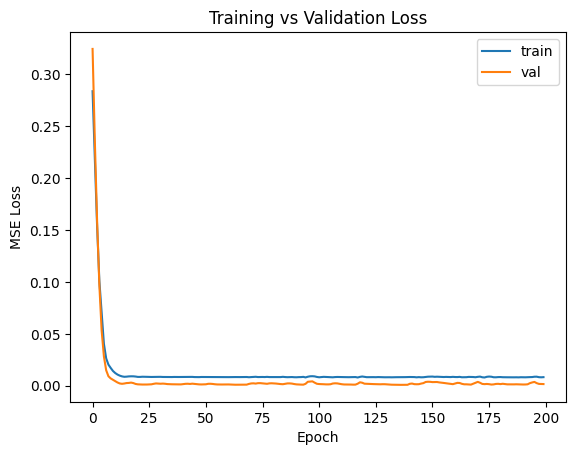

In [49]:
model.evaluate(X_test, y_test)
# Prediksi dan inverse transform hasil prediksi serta ground truth
pred = model.predict(X_test)
pred_inversed = y_scaler.inverse_transform(pred)

y_test_inversed = y_scaler.inverse_transform(y_test)

# Cetak 10 prediksi pertama vs nilai aslinya
for i in range(10):
    print(f"Prediksi: {pred_inversed[i][0]:.2f} detik, Asli: {y_test_inversed[i][0]:.2f} detik")

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.show()

In [50]:
from everywhereml.code_generators.tensorflow import convert_model
c_header = convert_model(model, X, y, model_name='modelANN')
print(c_header)

Saved artifact at '/tmp/tmphn3espy0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='keras_tensor_42')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140326437310672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140326437313168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140326437314128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140326437311056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140326437313744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140326437315280: TensorSpec(shape=(), dtype=tf.resource, name=None)
#pragma once

#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

// aut